In [17]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [18]:
# Cargar conjunto de datos simulado
np.random.seed(42)

n = 500
data = pd.DataFrame({
    'tipo_anuncio': np.random.choice(['imagen', 'video', 'carrusel'], n),
    'plataforma': np.random.choice(['Instagram', 'Facebook', 'YouTube'], n),
    'presupuesto_diario': np.random.randint(50, 500, n),
    'impresiones': np.random.randint(1000, 10000, n),
    'clics': np.random.randint(100, 2000, n),
    'conversiones': np.random.randint(10, 500, n),
    'cpc': np.round(np.random.uniform(0.1, 2.0, n), 2)
})

In [19]:
# Creamos una variable objetivo simulada: campaña exitosa (1) o no (0)
data['exitosa'] = (data['conversiones'] > 200).astype(int)
data.head()

,tipo_anuncio,plataforma,presupuesto_diario,impresiones,clics,conversiones,cpc,exitosa
0,carrusel,Facebook,296,4028,1158,173,0.33,0
1,imagen,Facebook,436,8643,297,104,1.50,0
2,carrusel,YouTube,292,3681,584,279,0.55,1
3,carrusel,Facebook,80,4629,1880,330,0.81,1
4,imagen,Instagram,89,5225,1182,119,0.22,0


In [20]:
# Codificación de variables categóricas
le1 = LabelEncoder()
le2 = LabelEncoder()
data['tipo_anuncio'] = le1.fit_transform(data['tipo_anuncio'])
data['plataforma'] = le2.fit_transform(data['plataforma'])


In [21]:
# Separación de variables
X = data.drop('exitosa', axis=1)
y = data['exitosa']

In [22]:
# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Separación de conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [24]:
# Modelo: Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Árbol de decisión:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))


Árbol de decisión:
[[61  0]
 [ 0 89]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        89

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Accuracy: 1.0


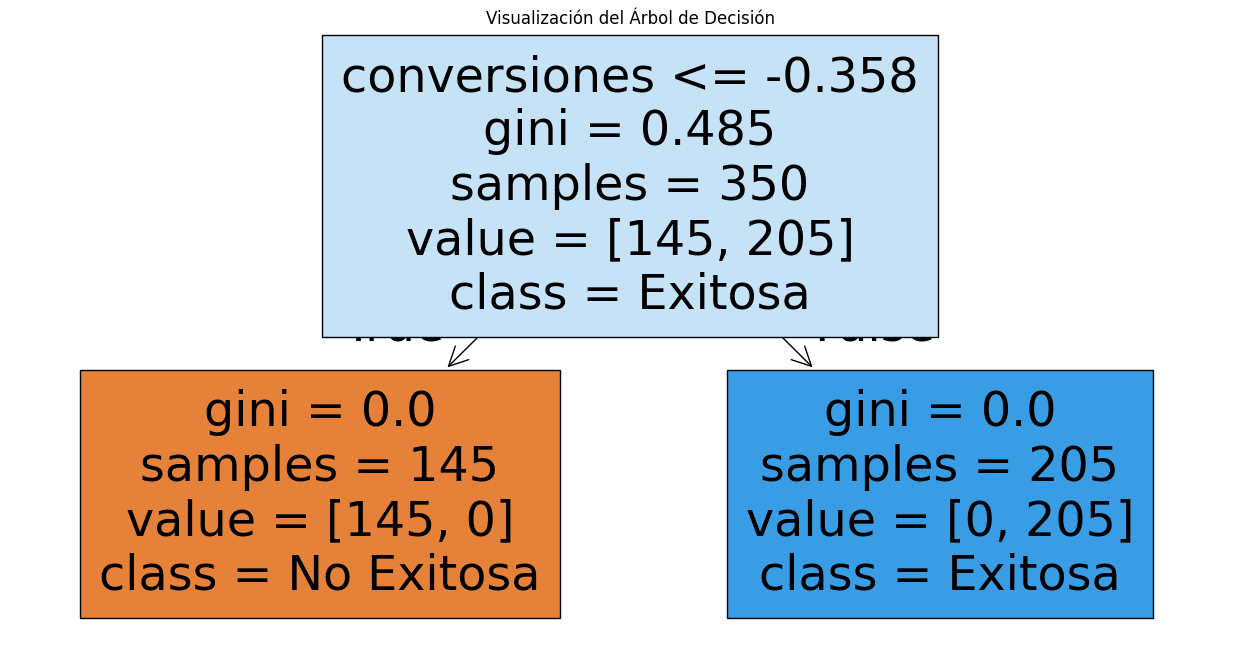

In [ ]:
# Visualizar el árbol de decisión
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=X.columns, class_names=["No Exitosa", "Exitosa"], filled=True)
plt.title("Visualización del Árbol de Decisión")
plt.show()


In [26]:
# Modelo: SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM:
[[61  0]
 [ 1 88]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.99      0.99        89

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Accuracy: 0.9933333333333333


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14228\2538367006.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="Set2")


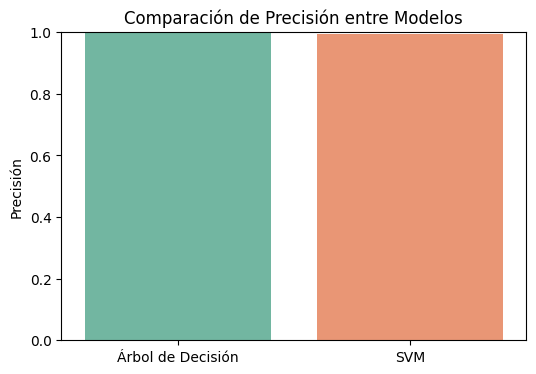

Precisión Árbol de Decisión: 1.00
Precisión SVM: 0.99


In [27]:
# Comparación de resultados
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

model_names = ['Árbol de Decisión', 'SVM']
accuracies = [accuracy_tree, accuracy_svm]

plt.figure(figsize=(6, 4))
sns.barplot(x=model_names, y=accuracies, palette="Set2")
plt.ylim(0, 1)
plt.title('Comparación de Precisión entre Modelos')
plt.ylabel('Precisión')
plt.show()


print(f"Precisión Árbol de Decisión: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Precisión SVM: {accuracy_score(y_test, y_pred_svm):.2f}")
